In [1]:
#Import Mods
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta

In [2]:
#Grab files from directory and sort them into correct order
files = []
for filename in glob.glob("/lcrc/project/waggle/public_html/private/training_data/waggle_area510/mobotix/thermal/"
                          "*.thermal.celsius.csv"):
    files.append(filename)
files.sort()

In [3]:
#Run through all images and save off minimum temperature for each
temp_min = []
image_time = []

timeset = datetime(2021, 4, 15, 5, 0)

for path in files:
    file = pd.read_csv(path)
    image_time.append(timeset)
    time_change = timedelta(minutes=7)
    timeset = timeset + time_change
    image_array = []
    
    
    for i in range(file.size):
        if i >= 6:
            data = file.values[i][0]
            data = data.split(';')
            array = np.array(data)
            array = array.astype(np.float)
            image_array.append(array)
            
    temp_min.append(np.min(image_array))

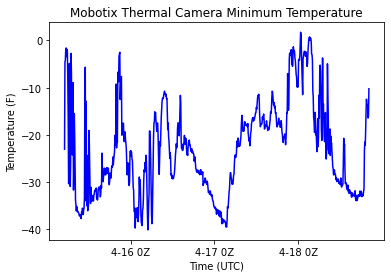

In [4]:
#Plot time series
plt.plot(image_time[0:750], temp_min[0:750], color = 'blue')

plt.xlabel('Time (UTC)')
plt.xticks((image_time[163], image_time[369], image_time[575]), ('4-16 0Z','4-17 0Z','4-18 0Z'))
plt.ylabel('Temperature (F)')

plt.title('Mobotix Thermal Camera Minimum Temperature')

#plt.savefig('Thermal_Time_Series_Third.png')

In [31]:
image_time[575]

datetime.datetime(2021, 4, 18, 0, 5)